# Tutorial i basal tekstgenkendelse fra billeder med Python

### Setup

#### Installer og test software

Inden vi går i gang skal installeres nødvendig software: 
* Anaconda (Python distribution med mange præinstallerede pakker): 
    * https://www.anaconda.com/distribution/ vælg 3.x
* Tesseract OCR (tekstgenkendelsessoftware)
    * https://github.com/UB-Mannheim/tesseract/wiki vælg 3.x eller 4.x
    
Mulligvis skal sprogpakker opdateres, opdaterede sprogpakker til Tesseract kan findes her: https://github.com/tesseract-ocr/tesseract/wiki/Data-Files 

Efter installation oprettes en (projekt)-folder på computer, hvor Python kode mm. gemmes. I denne notebook er følgende folder brugt: 

* C:\working\ngs-lib\Tekstgenkendelse_tutorial

Åbn en PowerShell i den oprettede folder. Dette gøres fx ved at navigere ind i folderen fra explorer, hold shift nede og højreklik, vælg da "Open PowerShell window here"

Tjek at software er korrekt installeret ved at køre kommandoer: 
* python --version
* tesseract --version

Hvis mangler sørg da for at deres installationsfoldere er tilføjet til computerens miljøvariable.

#### Opret virtuelt miljø og kør jupyter notebook

I Python oprettes typisk er virtuelt miljø for hvert projekt man arbejder på. Dette skyldes at man i forskellige projekter bruger forskellige pakker - og nogen gange i forskellige versioner. Ved at oprette et virtuelt miljø er man sikker på at man altid kan afvikle sin kode uafhængigt af hvilke pakker som andre projekter anvender.

I powershell køres følgende kommandoer:

* python -m venv .env 

Denne kommando kalder python, som kalder en indbygget pakke i Python der hedder *venv*, som argument til *venv* givet navnet *.env* som bliver navnet på det virtuelle miljø vi opretter (man kunne have valgt et andet, men "venv", "env" og ".env" er standard navne at bruge.

Efter installeres vores første python pakke med kommandoen "pip install". Vi skal i første omgang installere pakken "ipykernel". Dette gøres ved at køre følgende kommando: 
* pip install ipykernel

Herefter køres kommandoen: 
* python -m ipykernel install --user --name .env

Muligvis skal også køres
* pip install jupyter

Efter det virtuelle miljø er oprettet kan vi åbne vores yndlingseditor, i dette eksempel tager vi udgangspunkt i Jupyter notebook (som denne tutorial også er skrevet i). Juputer notebook startes ved at køre kommandoen

* jupyter notebook 

Din standard browser åbner nu et vindue med Jupyter notebook. Opret en Python 3 notebook og under "Kernel" vælg "Change kernel" og vælg den netop oprettede kernel. 

### Første Python kode

Den resterende del af tutorialen foregår i Jupyter notebook medmindre andet er angivet.

#### Print en besked

In [1]:
besked = 'Kommandoer køres i Jupyter notebook ved at trykke CTRL+Enter'
print(besked)

Kommandoer køres i Jupyter notebook ved at trykke CTRL+Enter


#### Første loop

In [3]:
blok_besked = 'Nye blokke af kode oprettes ved at trykke på "+"-øverst til højre.'
for i in range(0,10):
    print(i, blok_besked)

0 Nye blokke af kode oprettes ved at trykke på "+"-øverst til højre.
1 Nye blokke af kode oprettes ved at trykke på "+"-øverst til højre.
2 Nye blokke af kode oprettes ved at trykke på "+"-øverst til højre.
3 Nye blokke af kode oprettes ved at trykke på "+"-øverst til højre.
4 Nye blokke af kode oprettes ved at trykke på "+"-øverst til højre.
5 Nye blokke af kode oprettes ved at trykke på "+"-øverst til højre.
6 Nye blokke af kode oprettes ved at trykke på "+"-øverst til højre.
7 Nye blokke af kode oprettes ved at trykke på "+"-øverst til højre.
8 Nye blokke af kode oprettes ved at trykke på "+"-øverst til højre.
9 Nye blokke af kode oprettes ved at trykke på "+"-øverst til højre.


#### Første funktion

In [2]:
def print_besked():
    print('Det her er en simpel funktion')
    
print_besked()

Det her er en simpel funktion


#### Funktion med argumenter

In [6]:
def velkommen_navn(navn):
    return r"Hej {navn} og velkommen til denne fantastiske tutorial".format(navn=navn)

mit_navn = 'Alfons'
velkomst_besked = velkommen_navn(mit_navn)
print(velkomst_besked)

Hej Alfons og velkommen til denne fantastiske tutorial


#### Load af en fil

I Følgende antages at der eksisterer en fil med tekst på følgende destination (kan ændres efter behov): 
* C:\working\ngs-lib\Tekstgenkendelse_tutorial\data\Opskrift.txt'

In [7]:
file_path = r'C:\working\ngs-lib\Tekstgenkendelse_tutorial\data\Opskrift.txt'

with open(file_path, 'r') as f:
    text = f.read()

print(text)

Opskrift på drinken Unfaithful 

Ingredienser:
5 cl Hendricks gin
3 cl citronsaft
1,5 cl Cointreau,
En halv bar-ske rålakrids
2 cl honning
Agurk
Knust is

Fremgangsmåde:
Stød agurk, rålakrids og honning sammen. Tilsæt resten af ingredienserne, ryst dem i en shaker med is og si drinken gennem en ekstra si over i et cocktailglas.


### Installation af pakker

I følgende skal vi bruge forskellige pakker, dem installerer vi nu på forhånd. Der er tale om følgende pakker som skal køres som kommandoer i PowerShell:
* pip install matplotlib
* pip install Pillow
* pip install opencv-python
* pip install pytesseract 

Man kan læse mere om fx pytesseract på pypi's hjemmeside: 
* https://pypi.org/project/pytesseract/

#### Load og visning af et billede

I følgende antages at eksisterer et .jpg billede der indeholder en form for tekst på følgende destination: 
* C:\working\ngs-lib\Tekstgenkendelse_tutorial\data\InkedForan Alteret (1880) - Herman Bang (Det moderne gennembrud)_LI.jpg 

In [4]:
import matplotlib.pyplot as plt 
import pytesseract
import cv2

In [5]:
# Sti til billede
#image_file_path = r'C:\working\ngs-lib\Tekstgenkendelse_tutorial\data\100simuleringer.png'
#image_file_path = r'C:\working\ngs-lib\Tekstgenkendelse_tutorial\data\Foran Alteret (1880) - Herman Bang (Det moderne gennembrud).tiff'
image_file_path = r'C:\working\ngs-lib\Tekstgenkendelse_tutorial\data\InkedForan Alteret (1880) - Herman Bang (Det moderne gennembrud)_LI.jpg'
image = plt.imread(image_file_path)
print(image)

# for i in image:
#     if i > 500:
#         for l in i:
#             print(l)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


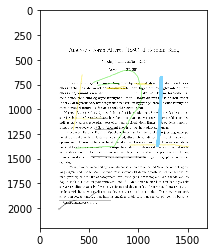

In [6]:
# Print billede
show_image = plt.imshow(image, cmap='gray')
plt.show(show_image)

### OCR (object character recognition - tekstgenkendelse) i billeder

In [7]:
# Indlæs billede
im = cv2.imread(image_file_path, cv2.IMREAD_COLOR)
# Configurer tesseract
config = ('-l dan --oem 0 --psm 3')
# Kør tesseract OCR på billede
text = pytesseract.image_to_string(im, config=config)
# Print tekst i billede
print(text)

Analyse — Foran Alteret (1880) af Herman Bang

Nicolaj Schmit hh3a - ZBC

NovenilgeLZL 2010

N.
/ Xl
I foran al eret gør/ég… endelig den i

ellers førhenfhavde været såWTide, han t ger emnet

,.

    
   
   
 
  
  
    
   
   
  

iske facade der
gteskab op som
ellers 1 hø _]rdmant1kken var Jvl ske man k ne forestille sig;
vi et helt andet

eller kærlighed

hvid brud, ne sind og ægte kærlighed. Men, i to 11 alteret
indtryk af gteskabet, hvor ægteskabet hverken bgéger på tros
men derimfnd penge og for at opretholde egerytus.

HermaniBang (18-57-1912) blev født på Als i he gdømmet Slesv
sine foræld i de førsmänaiham barndom, men ans far var stærkt
indlagt paå sindssygehospital, kort efter denne !:isode døde Bangsy

Bang blevfkostskoleelev på Sorø Akademi livfan tog sin studentere
I årene efter flyttede Bang til Købehav vor han fik flere forske

g voksede op med
rvesvækket og blev
r og dette betød at

noget tidspunkt at blive fastansat noget ted, disse job var digter, urnalist, instruk

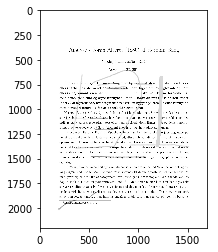

In [8]:
#Præprocessering inden OCR 

im = cv2.imread(image_file_path, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_gray = plt.imshow(gray, cmap='gray')
plt.show(show_gray)

In [9]:
text = pytesseract.image_to_string(gray, config=config)
print(text)

Analyse — Foran Alteret (1880) af Herman Bang

Nicolaj Schmit hh3a - ZBC

November 23, 2010

I foran alteret gør Herman Bang endelig op med den id liske facade der
ellers førhen havde været så dominerende, han tager emnet gteskab op som

nu.

ellers i hø jromantikken var ' 'dvlliske man k ine forestille sig;
hvid brud, rene sind og ægte kærlighed. Men, i toran alteret i vi et helt andet
indtryk af ægteskabet, hvor ægteskabet hverken bygger på tros b eller kærlighed
men derimod penge og for at opretholde egen status.

Herman Bang (18-57-1912) blev født på Als i hertugdømmet Slesvi og voksede op med
sine foraeldre i de første år… barndom, men hans far var stærkt rvesvækket og blev
indlagt på et sindssygehospital, kort efter denne episode døde Bangsy 1 ør og dette betød at
Bang blev kostskoleelev på Sorø Akademi hvor han tog sin studentere unen.

I årene efter flyttede Bang til Købehavn hvor han fik flere forske' ;e jobs dog uden på
noget tidspunkt at blive fastansat noget sted, disse job